In [12]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from Visualizations import Visualizer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [13]:
class TrainModel:
    def __init__(self, folder_name: str, file_name: str, target: str):
        self.folder_name = folder_name
        self.file_name = file_name
        self.data = self.load_data()  # load the data when initializing the object
        self.train_data, self.test_data = self.split_data()  # split the data into train and test sets
        self.train_data, self.validation_data = self.split_validation_data(validation_split=0.2)  # split the training data into train and validation sets
        self.train_labels, self.test_labels = self.split_labels(target=target)  # split the labels from the data

    def print_data(self):
        """Print train and test data (for me to just see if its working)"""
        print("Train Data:")
        print(self.train_data.head())  # display train data
        print("\nTest Data:")
        print(self.test_data.head())  # display test data
        
    def load_data(self) -> pd.DataFrame:
        """Load data from the data folder"""
        data = pd.read_csv("normalized_data.csv")  #read data file
        return data
    
    def split_data(self) -> pd.DataFrame:
        """Split data into train and test"""
        train_df, test_df = train_test_split(self.data, test_size=0.1, random_state=42) #90% train and 10% test
        return train_df, test_df
    
    def split_validation_data(self, validation_split: float):
        """Split train data into train and validation"""
        train_data, validation_data = train_test_split(
            self.train_data,
            test_size=validation_split, #80% train and 20% validation
            random_state=42  
        )
        return train_data, validation_data
    
    def split_labels(self, target: str) -> pd.DataFrame:
        """Split labels from the data"""
        self.train_labels = self.train_data.pop(target)
        self.test_labels = self.test_data.pop(target)
        return self.train_labels, self.test_labels
    
    #linear regression model
    def linear_regression(self) -> LinearRegression:
        """Linear regression model"""
        model = LinearRegression()
        model.fit(self.train_data, self.train_labels)
        predictions = model.predict(self.test_data)
        r2_score_value = r2_score(self.test_labels, predictions)
        print("Linear Regression R2 Score: ", r2_score_value)
        
        # Plotting the transactions using the 'plot_transactions' function with predictions
        self.plot_transactions(self.train_data, self.train_labels, 'Age', model.predict(self.train_data))
        self.plot_transactions(self.train_data, self.train_labels, 'Gender', model.predict(self.train_data))
        self.plot_transactions(self.train_data, self.train_labels, 'Merchant_Name', model.predict(self.train_data))
        self.plot_transactions(self.train_data, self.train_labels, 'Category', model.predict(self.train_data))
        self.plot_transactions(self.train_data, self.train_labels, 'Month', model.predict(self.train_data))
                
        return model  # returns the trained model
    def plot_transactions(self, train_data, train_labels, var, predictions):
        plt.figure(figsize=(12, 6))
        # Plotting the actual transaction amount against the selected variable using train data
        plt.scatter(train_data[var], train_labels, color='blue', label='Actual ' + var)
        # Adding predicted values to the plot
        plt.scatter(train_data[var], predictions, color='red', label='Predicted ' + var, alpha=0.5)
        # graph
        plt.xlabel(var)
        plt.ylabel('Transaction Amount')
        plt.title('Predicted vs Actual Transaction Amount (' + var + ')')
        plt.legend()
        plt.show()
    
    #decison tree
    def decision_tree(self) -> DecisionTreeRegressor:
        """Decision tree model"""
        #create a decisionTreeRegressor model 
        model = DecisionTreeRegressor() 
        #train the model using the training data 
        model.fit(self.train_data, self.train_labels)
        #make predictions using the test data 
        predictions = model.predict(self.test_data)
        #calaculate the R-squared socre to evalaute the model's proformance 
        r2_score_value = r2_score(self.test_labels, predictions)
        print("Decision Tree R2 Score: ", r2_score_value)
        return model
    def visualize_predictions(self, predictions, test_data):
        variables = test_data.columns  # Assuming test_data is a DataFrame with columns representing variables

        # create individual plots for each variable
        for var in variables:
            plt.figure(figsize=(8, 6))
            plt.scatter(test_data[var], predictions, label='Predicted ' + var, alpha=0.7)
            plt.scatter(test_data[var], self.test_labels, label='Actual ' + var, alpha=0.7)
            plt.title('Predicted vs Actual for ' + var)
            plt.xlabel(var)
            plt.ylabel('Target Variable')
            plt.legend()
            plt.show()
            
    #random forest 
    def random_forest(self, n_estimators: int = 500, max_depth: int = 10,
                      n_jobs: int = -1, random_state: int = None) -> RandomForestRegressor:
        """Random forest model"""
        # create an instance of the model
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            n_jobs=n_jobs,
            random_state=random_state
        )
        # train the model using training data
        model.fit(self.train_data, self.train_labels)
        # make predictions using the test data
        predictions = model.predict(self.test_data)
        # calculate R-squared and Mean Squared Error (MSE) to evaluate the model's performance
        r2_score_value = r2_score(self.test_labels, predictions)
        mse = mean_squared_error(self.test_labels, predictions)
        print("Random Forest R2 Score:", r2_score_value)
        print("Random Forest MSE:", mse)

        return model
    
    #DNN (might need work)
    def dnn(self) -> tuple:
        """Deep neural network model"""
        model = Sequential([
            Dense(128, activation='relu', input_shape=(self.train_data.shape[1],)),
            Dense(64, activation='relu'),
            Dense(1) 
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        # store the training history to get the number of trials (epochs)
        history = model.fit(self.train_data, self.train_labels, epochs=10, batch_size=32, verbose=1)
        # making predictions
        predictions = model.predict(self.test_data)
        # calculate R-squared
        r_squared = r2_score(self.test_labels, predictions)
        print("DNN R-squared Score:", r_squared)
        # visualizing predictions
        self.visualize_dnn_predictions(predictions, self.test_data)
        
    def visualize_dnn_predictions(self, predictions, test_data):
        variables = test_data.columns  
        for var in variables:
            plt.figure(figsize=(8, 6))
            plt.scatter(test_data[var], predictions, color='blue', label='Predicted ' + var)
            plt.scatter(test_data[var], self.test_labels, color='red', label='Actual ' + var, alpha=0.7)
            plt.xlabel(var)
            plt.ylabel('Transaction Amount')
            plt.title('Predicted vs Actual Transaction Amounts for ' + var)
            plt.legend()
            plt.show()
    
    def display_dependent_variable(self):
        """Display the dependent variable"""
        print("Dependent Variable:")
        print(self.train_labels.head())  # Display the first few rows of the dependent variable

In [14]:
model = TrainModel("AIM_DATASET", "normalized_data", "Transaction")

In [15]:
data = pd.read_csv("normalized_data.csv") 
print(data.columns)

Index(['Gender', 'Transaction', 'Merchant_Name', 'Category', 'Age', 'Month',
       'Year'],
      dtype='object')


In [16]:
model.display_dependent_variable()

Dependent Variable:
8791     0.053037
6518     0.036579
34603    0.669291
7948     0.026348
39190    0.152354
Name: Transaction, dtype: float64


Linear Regression R2 Score:  0.24479209157002024


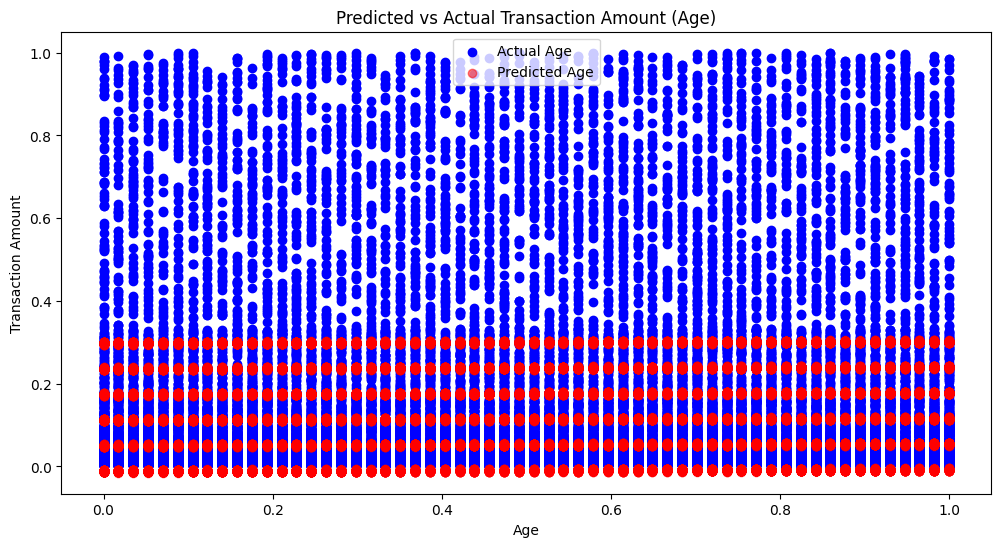

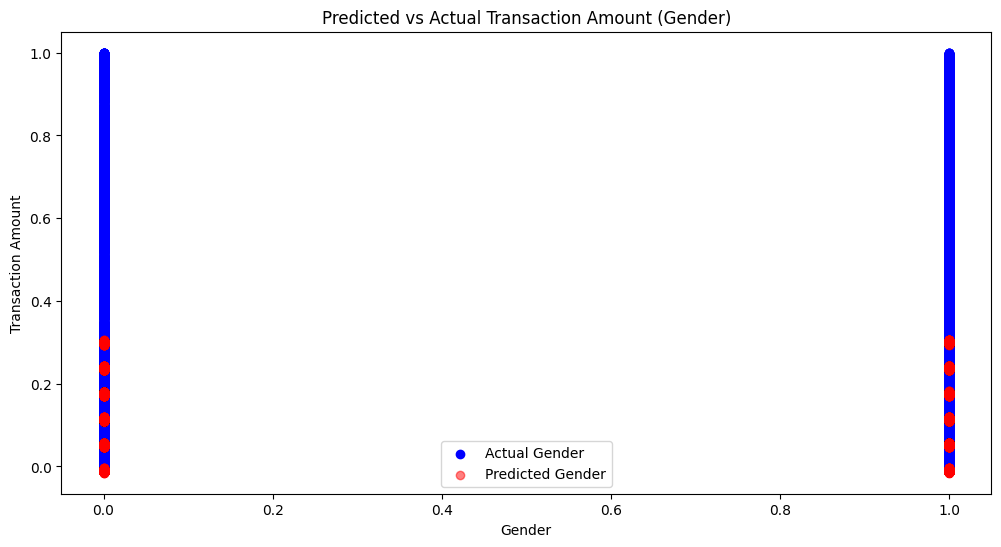

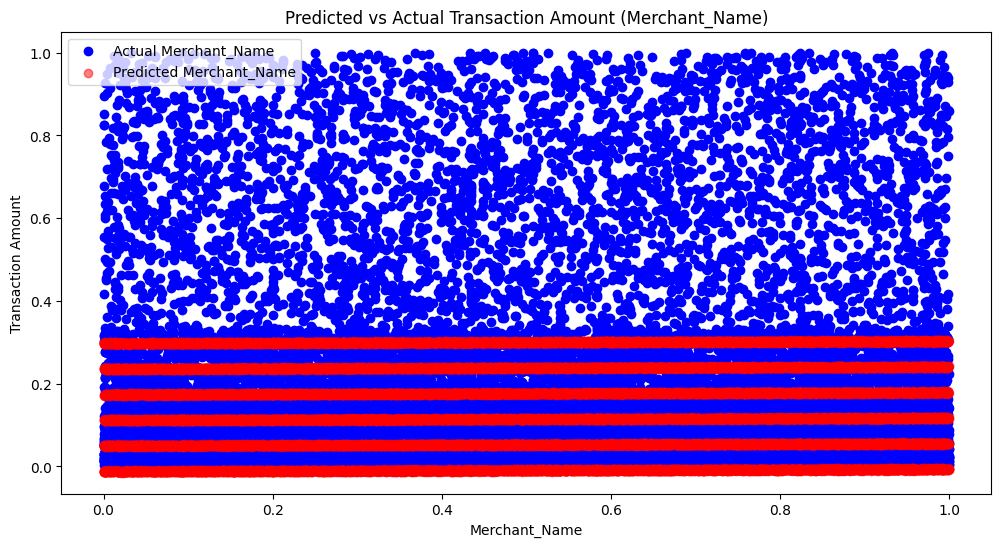

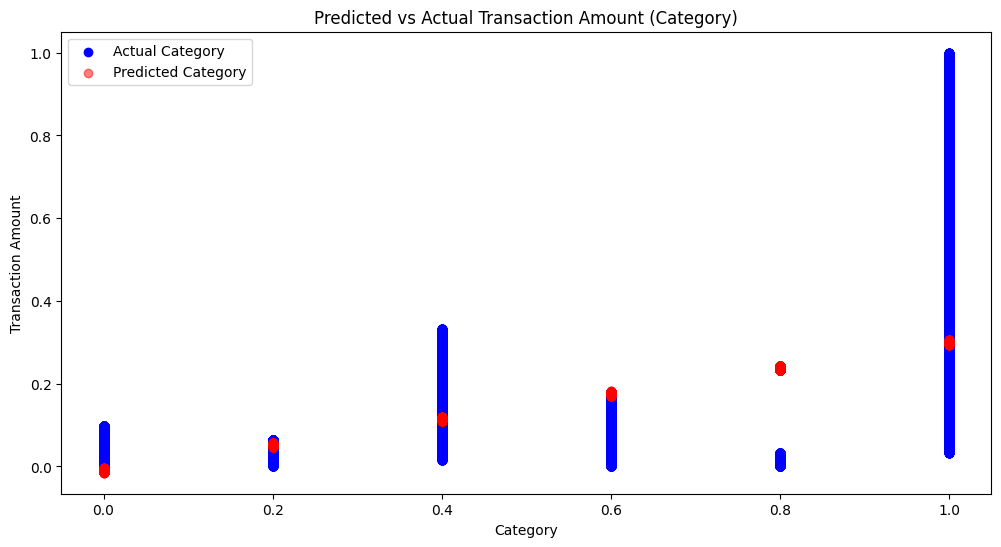

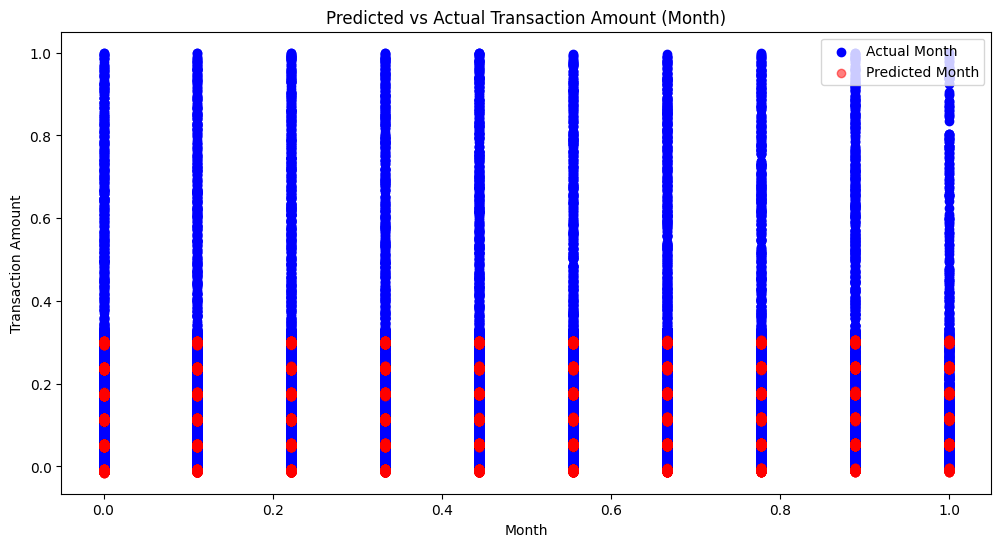

In [17]:
linear_model = model.linear_regression()

Decision Tree R2 Score:  0.2951235019963465


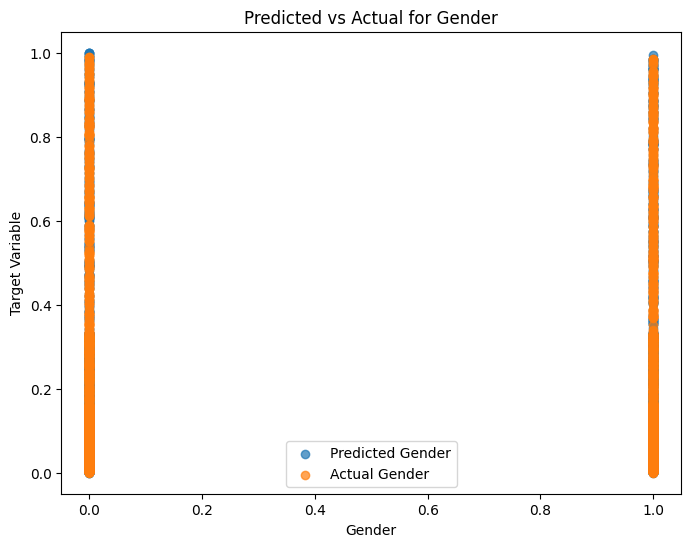

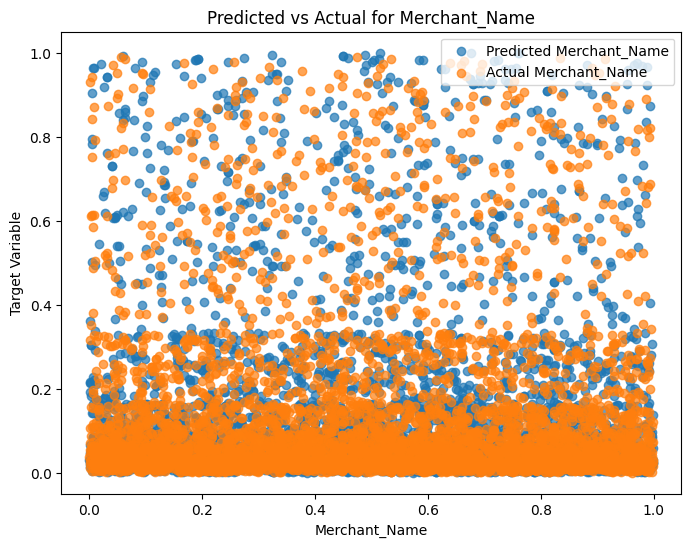

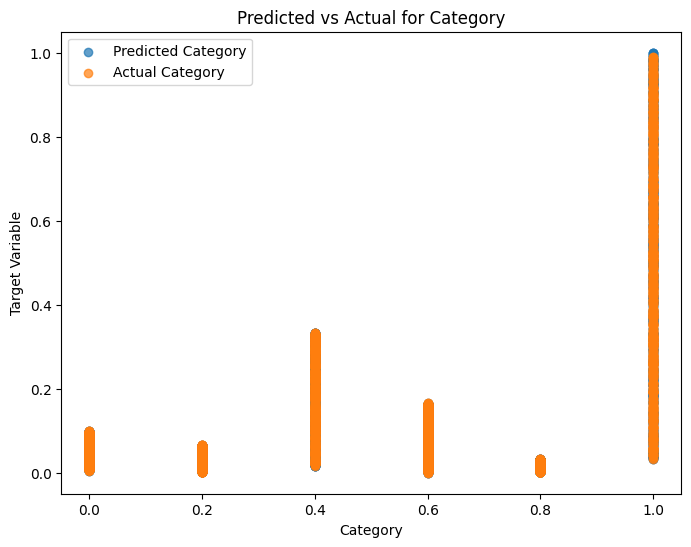

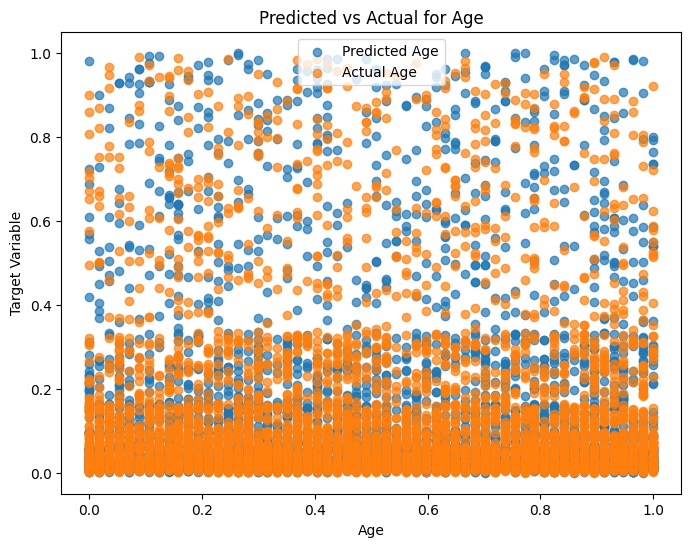

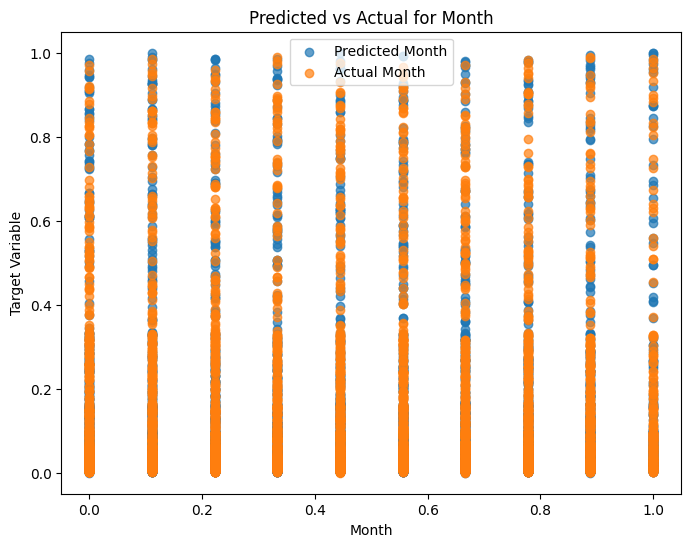

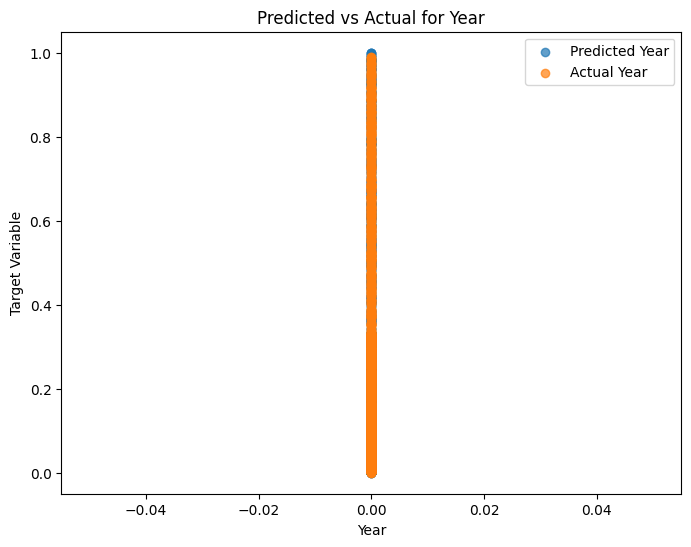

In [18]:
decision_tree_model = model.decision_tree()
# making predictions using the trained model
predictions = decision_tree_model.predict(model.test_data)
# visualizing predictions
model.visualize_predictions(predictions, model.test_data)

Random Forest R2 Score: 0.6565112724783276
Random Forest MSE: 0.014314066799484817


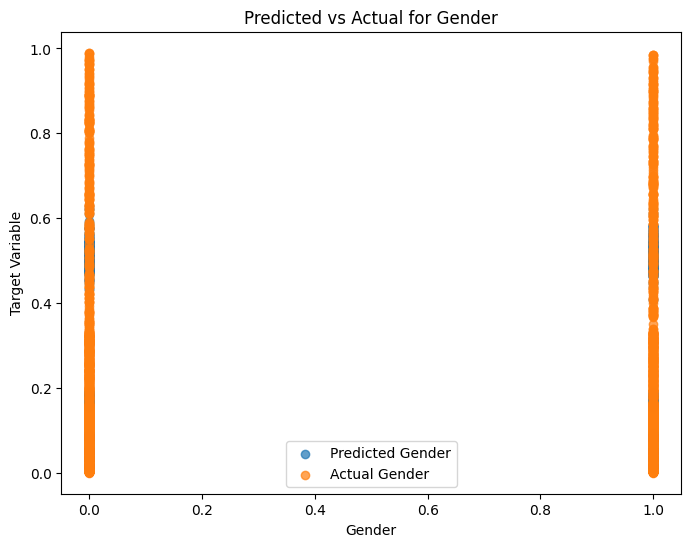

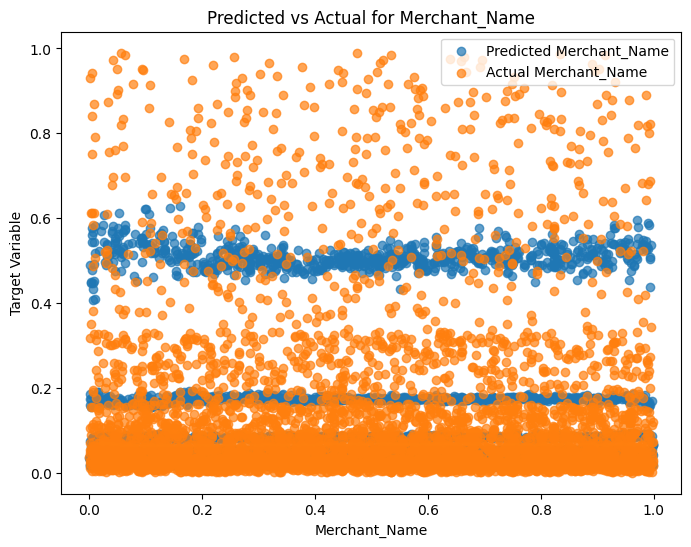

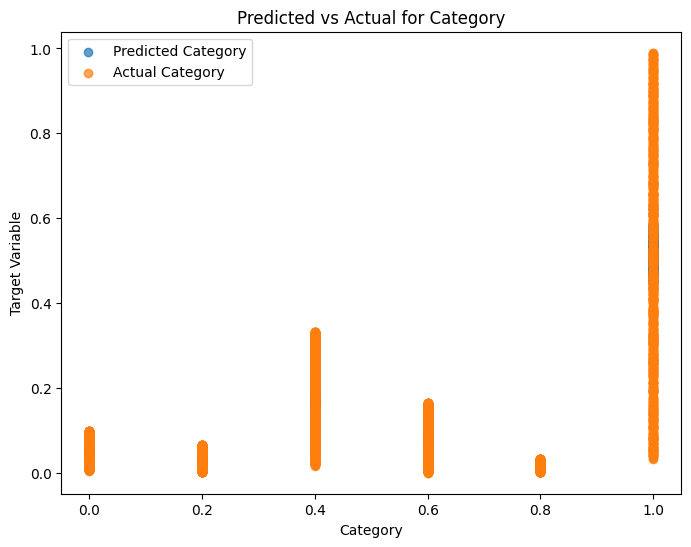

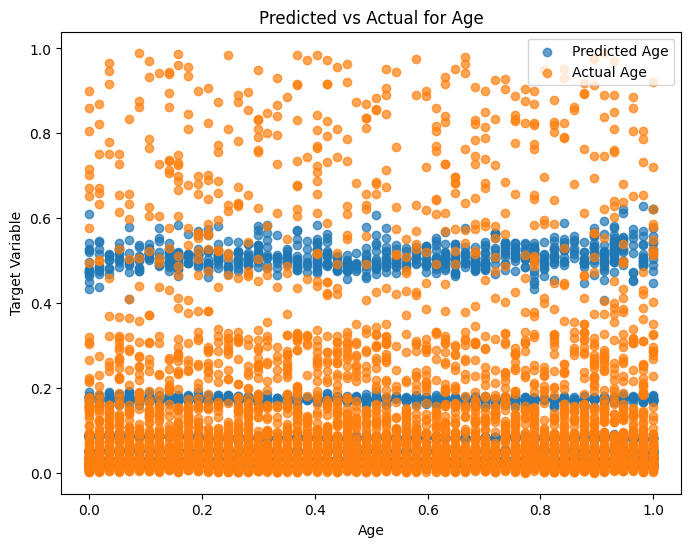

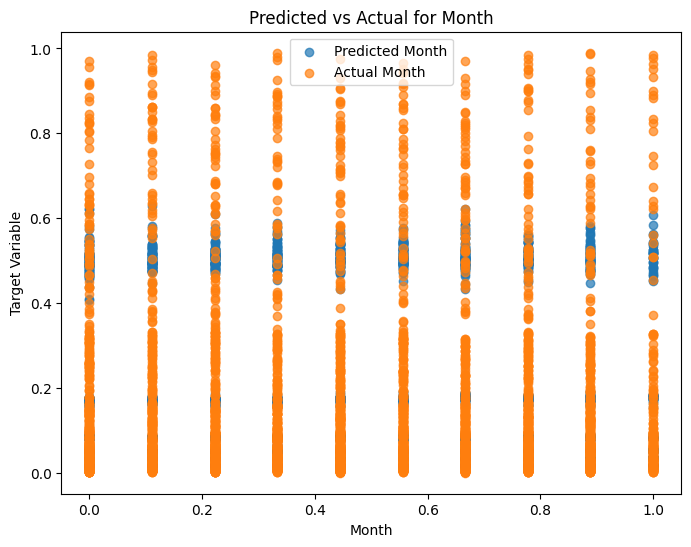

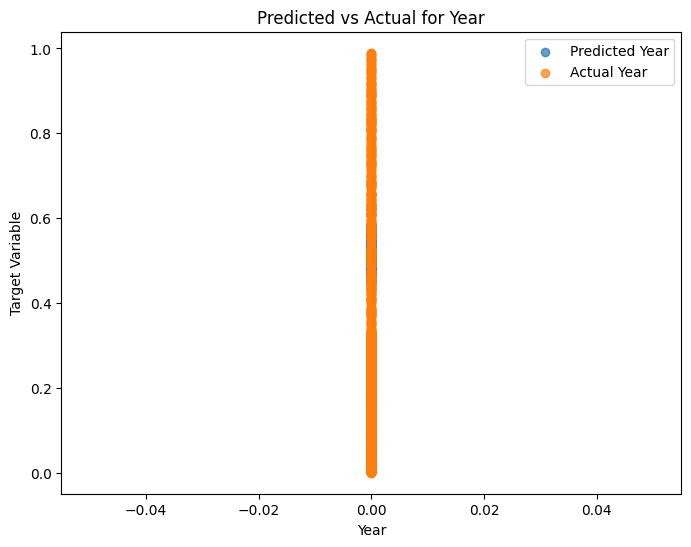

In [19]:
# Train the initial random forest model
initial_rf_model = model.random_forest()
rf_predictions = initial_rf_model.predict(model.test_data)
# Visualize predictions
model.visualize_predictions(rf_predictions, model.test_data)


In [21]:
#trained_dnn_model = model.dnn()

NameError: name 'Sequential' is not defined